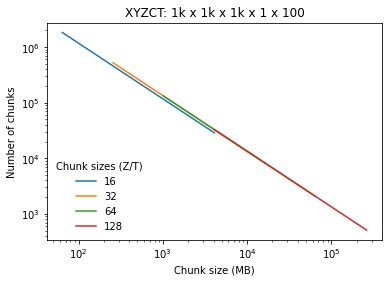

In [1]:
##### %matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

x = 1024
y = 1024
z = 1024
t = 100
c = 1
chunkSizes = (16, 32, 64, 128)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('Chunk size (XYZ)')
plt.ylabel('Number of chunks')
plt.title("XYZCT: 1k x 1k x 1k x 1 x 100");

def file_count(i, chunkT=1):
    return math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/i) * math.ceil(t/chunkT) * math.ceil(c/1)

for chunkT in (1, 10, 100):
    numFiles = []
    fileSize = []
    for i in chunkSizes:
        numFiles.__iadd__([file_count(i, chunkT)])
        fileSize.__iadd__([i])
    line, = ax.plot(fileSize, numFiles, label=f"{chunkT}")

plt.legend(loc="lower left", title="Chunk sizes (T)", frameon=False)

def scale(scale):
    plt.yscale(scale)
    plt.xscale(scale)

scale('log')
ax.annotate('Chosen chunk size\nT: 1, X: 64, Y: 64, Z: 64',
        xy=((64), file_count(64, 1)), xycoords='data',
        xytext=(0, 40), textcoords='offset points',
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='left', verticalalignment='bottom')
fig.savefig('/tmp/3d-chunks.png', dpi=800)